In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [2]:
train = pd.read_csv('../input/gender_age_train.csv',index_col='device_id')
test = pd.read_csv('../input/gender_age_test.csv',index_col='device_id')
phone = pd.read_csv('../input/phone_brand_device_model.csv',encoding='utf-8')
phone = phone.drop_duplicates('device_id',keep='first').set_index('device_id') #drop duplicate phone
events = pd.read_csv('../input/events.csv', parse_dates=['timestamp'], index_col='event_id')
appevents = pd.read_csv('../input/app_events.csv', usecols=['event_id','app_id','is_active'], dtype={'is_active':bool})
applabels = pd.read_csv('../input/app_labels.csv') #one app can have multiple labels
labelcat = pd.read_csv('../input/label_categories.csv')

C:\Users\yiqin\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
train.head(3)
phone.head(3)
events.head(3)
appevents.head(3)
applabels.head(3)
labelcat.head(3)

,gender,age,group
device_id,,,
-8076087639492063270,M,35,M32-38
-2897161552818060146,M,35,M32-38
-8260683887967679142,M,35,M32-38


,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4


,device_id,timestamp,longitude,latitude
event_id,,,,
1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70


,event_id,app_id,is_active
0,2,5927333115845830913,True
1,2,-5720078949152207372,False
2,2,-1633887856876571208,False


,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406


,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes


In [58]:
train.shape
test.shape
phone.shape
events.shape
appevents.shape
applabels.shape
labelcat.shape

(74645, 4)

(112071, 1)

(186716, 4)

(3252950, 4)

(32473067, 4)

(78204, 5)

(930, 2)

In [75]:
train.isnull().sum()
test.isnull().sum()
phone.isnull().sum()
events.isnull().sum()
appevents.isnull().sum()
applabels.isnull().sum()
labelcat.isnull().sum()

gender      0
age         0
group       0
trainrow    0
dtype: int64

testrow    0
dtype: int64

phone_brand           0
device_model          0
eng_phone_brand    1184
brand                 0
dtype: int64

device_id    0
timestamp    0
longitude    0
latitude     0
dtype: int64

event_id     0
app_id       0
is_active    0
app          0
dtype: int64

app_id      0
label_id    0
app         0
label       0
category    0
dtype: int64

label_id    0
category    3
dtype: int64

# EDA

#### Group and Phone

In [3]:
phone_brand = list(["索尼", "中兴", "金立", "魅族", "华为", "酷派", "小米", "MIL", "PPTV", "ZOYE", "Lovme", "SUGAR", "LOGO", "TCL", "ZUK", "LG", "HTC", "vivo", "OPPO", "E派", "一加", "三星","中国移动","乐视","乡米","优米","优购","努比亚","华硕","唯米","基伍","夏新","大可乐","天语","富可视","小杨树","尼比鲁","德赛","摩乐","摩托罗拉","昂达","易派","普耐尔","朵唯","梦米","欧新","欧比","沃普丰","波导","海信","海尔","爱派尔","神舟","米奇","米歌","糖葫芦","糯米","纽曼","维图","美图","聆韵","联想","艾优尼","西米","语信","诺基亚","谷歌","邦华","酷比魔方","酷珀","锤子","青橙","飞秒","黑米"])
eng_phone_brand = list(["Sony", "ZTE", "gionee", "meizu", "huawei", "coolpad", "MI", "MIL", "PPTV", "ZOYE", "Lovme", "SUGAR", "LOGO", "TCL", "ZUK", "LG", "HTC", "vivo", "OPPO", "epai","oneplus", "samsung", "ccmc", "lshi", "xiangmi", "youmi", "yougo", "nubia", "asus", "weimi", "kiwu", "panosonic", "bigcola", "Ktouch", "fks", "smallt", "nibilu", "desci", "mole", "moto", "ada", "epai", "pner", "dowe", "mengmi", "ouxin", "obi", "wpf", "bodao", "hisense", "haier", "ipair", "hasse", "micky", "mige", "candy", "nuomi", "newman", "weitu", "meitu", "lingyun", "lenovo", "aiyouni", "ximi", "yuxin", "nokia", "google", "banghua", "koobee", "kupo", "hammer", "greeno", "fs", "heymi"])
phone_brand_trans = pd.DataFrame({'phone_brand': phone_brand, 'eng_phone_brand': eng_phone_brand})
phone = phone.merge(phone_brand_trans,how = "left", on = "phone_brand").set_index(phone.index)
phone.head(3)

,eng_phone_brand,phone_brand
0,Sony,索尼
1,ZTE,中兴
2,gionee,金立
3,meizu,魅族
4,huawei,华为


,phone_brand,device_model,eng_phone_brand
device_id,,,
-8890648629457979026,小米,红米,MI
1277779817574759137,小米,MI 2,MI
5137427614288105724,三星,Galaxy S4,samsung


C:\Users\yiqin\Anaconda3\lib\site-packages\seaborn\categorical.py:1424: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


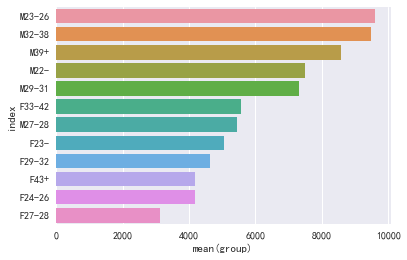

In [5]:
group = train["group"].value_counts().reset_index()
sns.barplot(y = group["index"],x = group["group"])

C:\Users\yiqin\Anaconda3\lib\site-packages\seaborn\categorical.py:1424: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


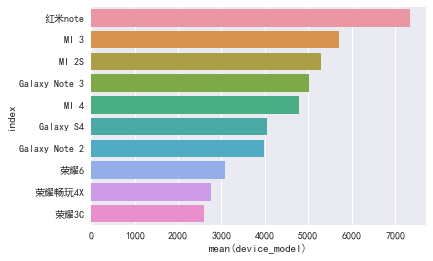

In [6]:
device_count = phone["device_model"].value_counts().reset_index().head(10)
sns.barplot(y = device_count["index"],x = device_count["device_model"])

C:\Users\yiqin\Anaconda3\lib\site-packages\seaborn\categorical.py:1464: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


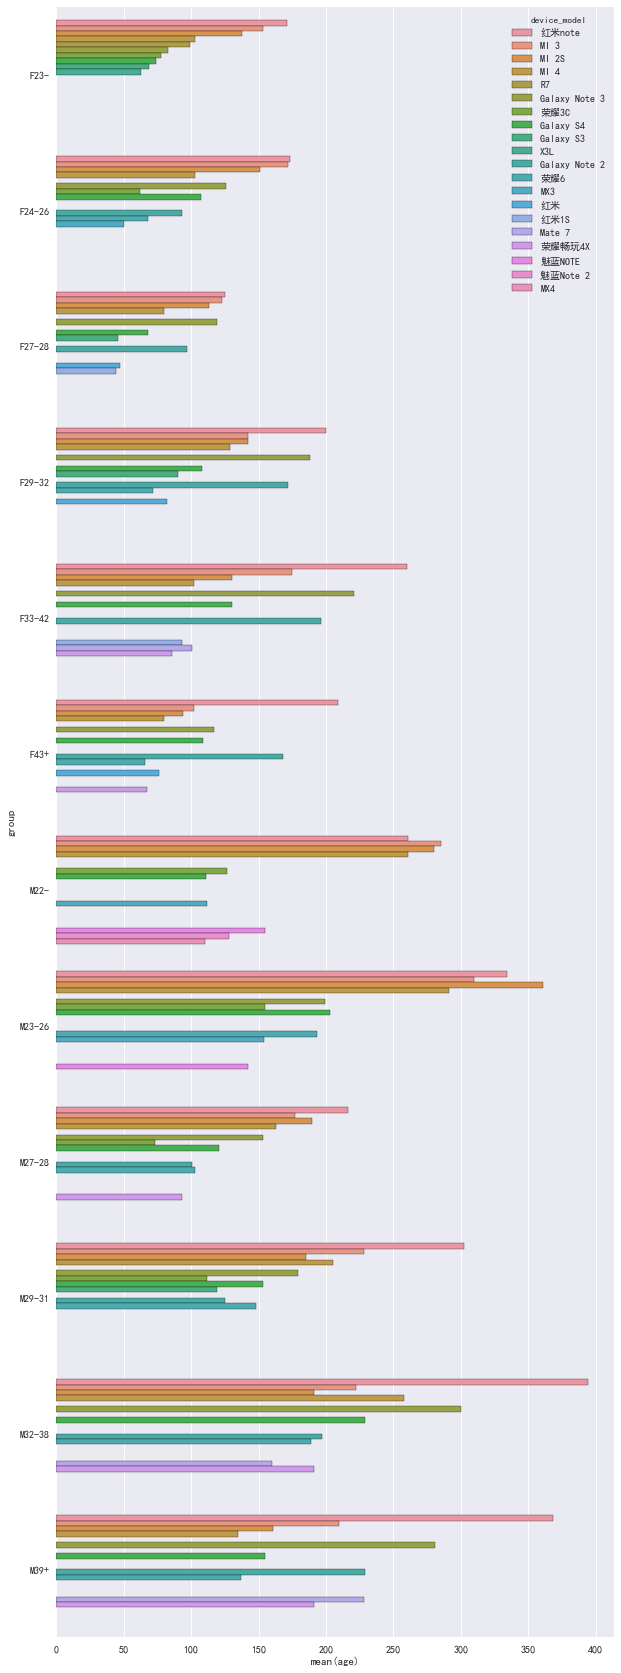

In [7]:
train_phone = pd.merge(train,phone,how = "left", left_index=True, right_index=True)

d1 = train_phone.groupby(["device_model","group"])["age"].count().reset_index().sort_values(by = ["age"],ascending = False)
d2 = d1.groupby('group').apply(lambda dfg: dfg.nlargest(10,'age')).reset_index(drop=True)

plt.figure(figsize=(10,30))  
sns.barplot(y = d2["group"],x = d2["age"],hue = d2["device_model"],edgecolor="black")

C:\Users\yiqin\Anaconda3\lib\site-packages\seaborn\categorical.py:1424: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


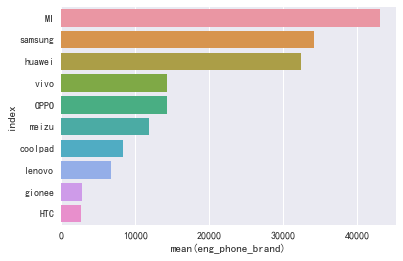

In [8]:
brand_count = phone["eng_phone_brand"].value_counts().reset_index().head(10)
sns.barplot(y = brand_count["index"],x = brand_count["eng_phone_brand"])

C:\Users\yiqin\Anaconda3\lib\site-packages\seaborn\categorical.py:1464: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


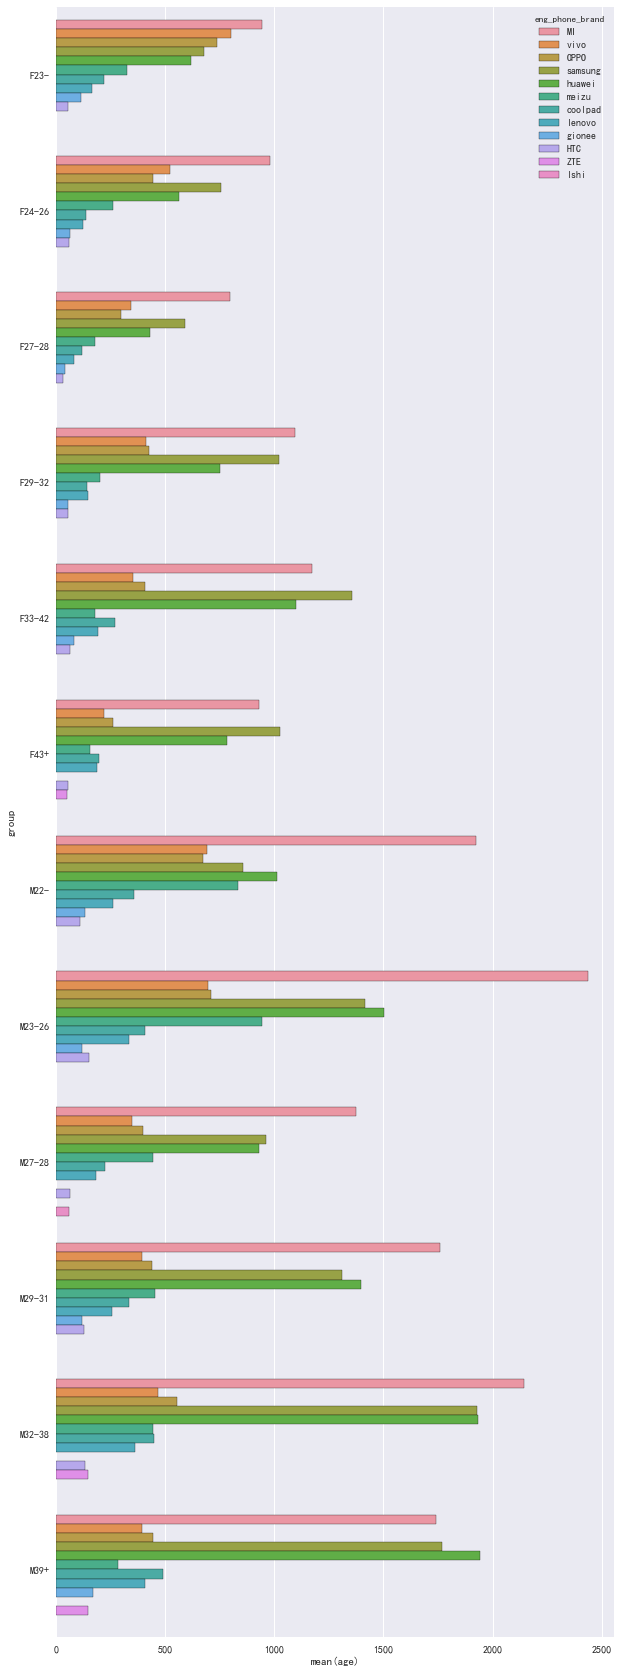

In [9]:
train_phone = pd.merge(train,phone,how = "left", left_index=True, right_index=True)

d1 = train_phone.groupby(["eng_phone_brand","group"])["age"].count().reset_index().sort_values(by = ["age"],ascending = False)
d2 = d1.groupby('group').apply(lambda dfg: dfg.nlargest(10,'age')).reset_index(drop=True)

plt.figure(figsize=(10,30))  
sns.barplot(y = d2["group"],x = d2["age"],hue = d2["eng_phone_brand"],edgecolor="black")

# Data Processing

In [3]:
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix, hstack

In [4]:
train['trainrow'] = np.arange(train.shape[0])
test['testrow'] = np.arange(test.shape[0])

#### phone brand

In [5]:
#add english name to phone brand
phone_brand = list(["索尼", "中兴", "金立", "魅族", "华为", "酷派", "小米", "MIL", "PPTV", "ZOYE", "Lovme", "SUGAR", "LOGO", "TCL", "ZUK", "LG", "HTC", "vivo", "OPPO", "E派", "一加", "三星","中国移动","乐视","乡米","优米","优购","努比亚","华硕","唯米","基伍","夏新","大可乐","天语","富可视","小杨树","尼比鲁","德赛","摩乐","摩托罗拉","昂达","易派","普耐尔","朵唯","梦米","欧新","欧比","沃普丰","波导","海信","海尔","爱派尔","神舟","米奇","米歌","糖葫芦","糯米","纽曼","维图","美图","聆韵","联想","艾优尼","西米","语信","诺基亚","谷歌","邦华","酷比魔方","酷珀","锤子","青橙","飞秒","黑米"])
eng_phone_brand = list(["Sony", "ZTE", "gionee", "meizu", "huawei", "coolpad", "MI", "MIL", "PPTV", "ZOYE", "Lovme", "SUGAR", "LOGO", "TCL", "ZUK", "LG", "HTC", "vivo", "OPPO", "epai","oneplus", "samsung", "ccmc", "lshi", "xiangmi", "youmi", "yougo", "nubia", "asus", "weimi", "kiwu", "panosonic", "bigcola", "Ktouch", "fks", "smallt", "nibilu", "desci", "mole", "moto", "ada", "epai", "pner", "dowe", "mengmi", "ouxin", "obi", "wpf", "bodao", "hisense", "haier", "ipair", "hasse", "micky", "mige", "candy", "nuomi", "newman", "weitu", "meitu", "lingyun", "lenovo", "aiyouni", "ximi", "yuxin", "nokia", "google", "banghua", "koobee", "kupo", "hammer", "greeno", "fs", "heymi"])
phone_brand_trans = pd.DataFrame({'phone_brand': phone_brand, 'eng_phone_brand': eng_phone_brand})
phone = phone.merge(phone_brand_trans,how = "left", on = "phone_brand").set_index(phone.index)

#encode brand
brandencoder = LabelEncoder().fit(phone.phone_brand)
phone['brand'] = brandencoder.transform(phone['phone_brand'])
phone.head(3)

,phone_brand,device_model,eng_phone_brand,brand
device_id,,,,
-8890648629457979026,小米,红米,MI,51
1277779817574759137,小米,MI 2,MI,51
5137427614288105724,三星,Galaxy S4,samsung,15


In [6]:
train_phone = pd.merge(train,phone,how = "left", left_index=True, right_index=True)
test_phone = pd.merge(test,phone,how = "left", left_index=True, right_index=True)
train_phone.head(3)
test_phone.head(3)

,gender,age,group,trainrow,phone_brand,device_model,eng_phone_brand,brand
device_id,,,,,,,,
-8076087639492063270,M,35,M32-38,0,小米,MI 2,MI,51
-2897161552818060146,M,35,M32-38,1,小米,MI 2,MI,51
-8260683887967679142,M,35,M32-38,2,小米,MI 2,MI,51


,testrow,phone_brand,device_model,eng_phone_brand,brand
device_id,,,,,
1002079943728939269,0,小米,小米note,MI,51
-1547860181818787117,1,小米,红米2,MI,51
7374582448058474277,2,华为,Y523-L176,huawei,31


10 most popular brands account for more than 90% of devices. 

(0, 30)

Text(0.5,0,'N most popular brands')

Text(0,0.5,'% of devices')

C:\Users\yiqin\Anaconda3\lib\site-packages\seaborn\categorical.py:1424: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,0,'count of brand')

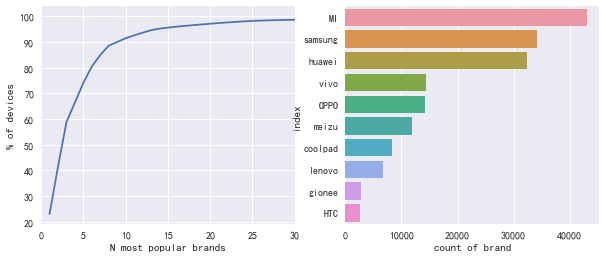

In [24]:
c = phone.brand.value_counts()
s = c.cumsum()/c.sum()
fig, (ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(10,4))
ax1.plot(np.arange(s.shape[0])+1, s.values*100)
ax1.set_xlim(0,30)
ax1.set_xlabel('N most popular brands')
ax1.set_ylabel('% of devices')

brand_count = phone["eng_phone_brand"].value_counts().reset_index().head(10)
ax2 = sns.barplot(y = brand_count["index"],x = brand_count["eng_phone_brand"])
ax2.set_xlabel('count of brand')

top 10 phone brand in each group

C:\Users\yiqin\Anaconda3\lib\site-packages\seaborn\categorical.py:1464: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


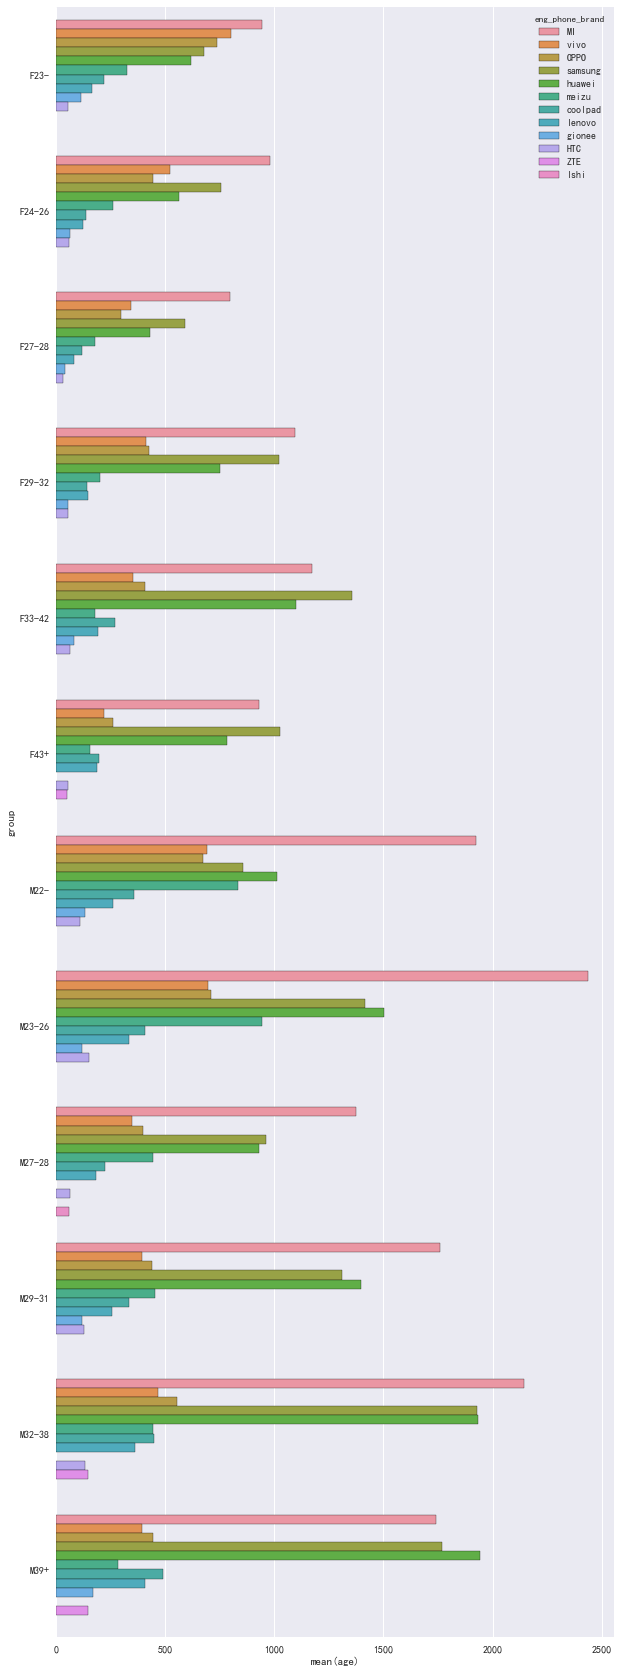

In [8]:
d1 = train_phone.groupby(["eng_phone_brand","group"])["age"].count().reset_index().sort_values(by = ["age"],ascending = False)
d2 = d1.groupby('group').apply(lambda dfg: dfg.nlargest(10,'age')).reset_index(drop=True)

plt.figure(figsize=(10,30))  
sns.barplot(y = d2["group"],x = d2["age"],hue = d2["eng_phone_brand"],edgecolor="black")

Median age in top 10 phone brand. User of Samsung, Huawei and lenova are relativly older.

C:\Users\yiqin\Anaconda3\lib\site-packages\seaborn\categorical.py:478: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


(0, 60)

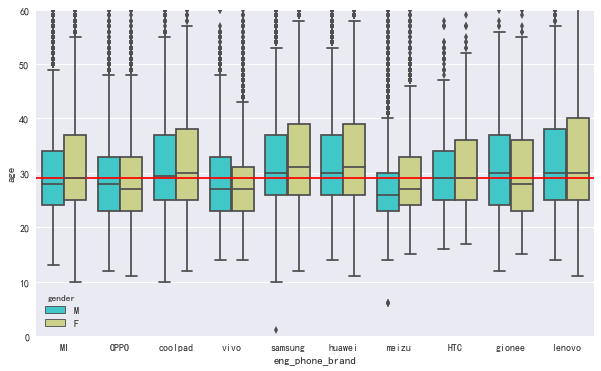

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "eng_phone_brand", y = "age", hue = "gender",palette='rainbow',
            data=train_phone.loc[train_phone["eng_phone_brand"].isin(list(brand_count["index"]))])
plt.axhline(train_phone["age"].median(),color = "red")
plt.ylim(0,60)

OPPO, Samsung, and Vivo are preffered by female than male

Text(0.5,0,'brand')

Text(0,0.5,'percentage')

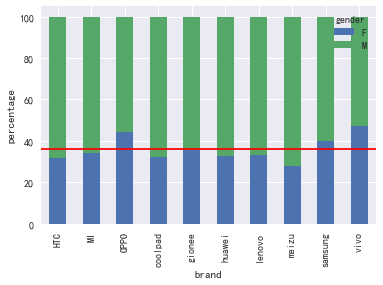

In [53]:
d1 = train_phone.loc[train_phone["eng_phone_brand"].isin(list(brand_count["index"]))].groupby(
    ["eng_phone_brand","gender"])["age"].count()
d2 = d1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
d2.unstack().plot(kind='bar',stacked=True)
plt.axhline(d2.unstack()["F"].mean(),color = "red")
plt.xlabel("brand")
plt.ylabel("percentage")

In [64]:
Xtr_brand = csr_matrix((np.ones(train_phone.shape[0]), 
                       (train_phone.trainrow, train_phone.brand)))
Xte_brand = csr_matrix((np.ones(test_phone.shape[0]), 
                       (test_phone.testrow, test_phone.brand)))
print('Brand data: train shape {}, test shape {}'.format(Xtr_brand.shape, Xte_brand.shape))
Xtr_brand.toarray()

Brand data: train shape (74645, 131), test shape (112071, 131)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### APP Count

In [11]:
appevents.head(3)

,event_id,app_id,is_active
0,2,5927333115845830913,True
1,2,-5720078949152207372,False
2,2,-1633887856876571208,False


In [12]:
appencoder = LabelEncoder().fit(appevents.app_id)
appevents['app'] = appencoder.transform(appevents.app_id)
napps = len(appencoder.classes_)
deviceapps = (appevents.merge(events[['device_id']], how='left',left_on='event_id',right_index=True)
                       .groupby(['device_id','app'])['app'].agg(['size'])
                       .merge(train, how='left', left_index=True, right_index=True)
                       .merge(test, how='left', left_index=True, right_index=True)
                       .reset_index())
"""
deviceapps = (appevents.merge(events[['device_id']], how='left',left_on='event_id',right_index=True)
                       .groupby(['device_id','app'])['is_active'].agg(['sum'])
                       .merge(train, how='left', left_index=True, right_index=True)
                       .merge(test, how='left', left_index=True, right_index=True)
                       .reset_index())
"""
deviceapps.head()

"\ndeviceapps = (appevents.merge(events[['device_id']], how='left',left_on='event_id',right_index=True)\n                       .groupby(['device_id','app'])['is_active'].agg(['sum'])\n                       .merge(train, how='left', left_index=True, right_index=True)\n                       .merge(test, how='left', left_index=True, right_index=True)\n                       .reset_index())\n"

,device_id,app,size,gender,age,group,trainrow,testrow
0,-9222956879900151005,548,18,M,36.0,M32-38,21594.0,NaN
1,-9222956879900151005,1096,18,M,36.0,M32-38,21594.0,NaN
2,-9222956879900151005,1248,26,M,36.0,M32-38,21594.0,NaN
3,-9222956879900151005,1545,12,M,36.0,M32-38,21594.0,NaN
4,-9222956879900151005,1664,18,M,36.0,M32-38,21594.0,NaN


In [ ]:
app_count = deviceapps.group_by["app"].value_counts().reset_index().head(10)
sns.barplot(y = brand_count["index"],x = brand_count["eng_phone_brand"])

In [13]:
d = deviceapps.dropna(subset=['trainrow'])
Xtr_app = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.app)), 
                      shape=(train.shape[0],napps))
d = deviceapps.dropna(subset=['testrow'])
Xte_app = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.app)), 
                      shape=(test.shape[0],napps))
print('Apps data: train shape {}, test shape {}'.format(Xtr_app.shape, Xte_app.shape))

Apps data: train shape (74645, 19237), test shape (112071, 19237)


#### APP Label

In [14]:
applabels = applabels.loc[applabels.app_id.isin(appevents.app_id.unique())]
applabels['app'] = appencoder.transform(applabels.app_id)
labelencoder = LabelEncoder().fit(applabels.label_id)
applabels['label'] = labelencoder.transform(applabels.label_id)
nlabels = len(labelencoder.classes_)
applabels = applabels.merge(labelcat,on="label_id")
applabels.head(3)

,app_id,label_id,app,label,category
0,7324884708820027918,251,17355,207,Finance
1,-4494216993218550286,251,4618,207,Finance
2,8756705988821000489,251,18741,207,Finance


In [62]:
devicelabels = (deviceapps[['device_id','app']]
                .merge(applabels[['app','label','category']])
                .groupby(['device_id','label','category'])['app'].agg(['size'])
                .merge(train, how='left', left_index=True, right_index=True)
                .merge(test, how='left', left_index=True, right_index=True)
                .reset_index())
devicelabels.head()

,device_id,label,category,size,gender,age,group,trainrow,testrow
0,-9222956879900151005,117,magazine and journal,1,M,36.0,M32-38,21594.0,NaN
1,-9222956879900151005,120,reading platform,1,M,36.0,M32-38,21594.0,NaN
2,-9222956879900151005,126,news,1,M,36.0,M32-38,21594.0,NaN
3,-9222956879900151005,138,IM,2,M,36.0,M32-38,21594.0,NaN
4,-9222956879900151005,147,map,2,M,36.0,M32-38,21594.0,NaN


In [63]:
d = devicelabels.dropna(subset=['trainrow'])
Xtr_label = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.label)), 
                      shape=(train.shape[0],nlabels))
d = devicelabels.dropna(subset=['testrow'])
Xte_label = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.label)), 
                      shape=(test.shape[0],nlabels))
print('Labels data: train shape {}, test shape {}'.format(Xtr_label.shape, Xte_label.shape))

Labels data: train shape (74645, 492), test shape (112071, 492)


# Modeling

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import log_loss

C:\Users\yiqin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
targetencoder = LabelEncoder().fit(train.group)
Ytrain = targetencoder.transform(train.group)
Ytrain
nclasses = len(targetencoder.classes_)
nclasses

In [65]:
Xtrain = hstack((Xtr_brand, Xtr_app, Xtr_label), format='csr')
Xtest =  hstack((Xte_brand, Xte_app, Xte_label), format='csr')
print('All features: train shape {}, test shape {}'.format(Xtrain.shape, Xtest.shape))

All features: train shape (74645, 19860), test shape (112071, 19860)


split train into train and test(validation)

In [74]:
dtrain_X, dtest_X, dtrain_y, dtest_y = \
train_test_split(Xtrain, Ytrain, random_state=1026, test_size=0.2)
print('All features: train shape {}, test shape {}'.format(dtrain_X.shape, dtest_X.shape))

All features: train shape (59716, 19860), test shape (14929, 19860)


## Logistic Regression

In [197]:
def eval_logit(train_x,train_y,clf, random_state = 0):
    kf = StratifiedKFold(train_y, n_folds=4, shuffle=True, random_state=random_state)
    pred = np.zeros((train_y.shape[0],nclasses))
    for itrain, itest in kf:
        Xtr, Xte = train_x[itrain, :], train_x[itest, :]
        ytr, yte = train_y[itrain], train_y[itest]
        clf.fit(Xtr, ytr)
        pred[itest,:] = clf.predict_proba(Xte)
        #print("{:.5f}".format(log_loss(yte, pred[itest,:])), end=' ')
    #print('')
    return log_loss(train_y, pred)


def opt_logit_parm(train_x,train_y,random_state = 0, C = 0.02, solver = 'lbfgs', Cs = None, solvers = None):
    #C: smaller values specify stronger regularization
    #solver: ‘newton-cg’, ‘sag’, and ‘lbfgs’
    if list(Cs) and solvers:
        try:
            for solver in solvers:
                res = []
                for C in Cs:
                    clf = LogisticRegression(C = C, multi_class='multinomial', solver=solver)
                    los_score = eval_logit(train_x,train_y,clf,random_state)
                    print("C = {},solver = {}, log_loss = {}".format(C,solver,los_score))
                    res.append(los_score)
                plt.plot(Cs, res,'-o',label = solver)
            plt.legend()
            #plt.xticks(rotation='vertical')
            return 
        except:
            print("error")
            return
              
    try:
        res = []
        for C in Cs:
            print("C = {},solver = {}".format(C,solver))
            clf = LogisticRegression(C = C, multi_class='multinomial', solver=solver)
            res.append(eval_logit(train_x,train_y,clf,random_state))
        plt.semilogx(Cs, res,'-o')
        C = Cs[np.array(res).argmin()] #set C with smallest log_loss when test solver
    except:
        print("no 'C' to be evaluated")
    
    try:
        for solver in solvers:
            print("C = {},solver = {}".format(C,solver))
            clf = LogisticRegression(C = C, multi_class='multinomial', solver=solver)
            los_score = eval_logit(train_x,train_y,clf,random_state)
            print("Solver {} has a log_loss score of {}".format(solver,los_score))
            print("")
    except:
        print("no 'solver' to be evaluated")     

C = 0.019,solver = newton-cg, log_loss = 2.285148162822099
C = 0.02,solver = newton-cg, log_loss = 2.285177905434287
C = 0.021,solver = newton-cg, log_loss = 2.2852465971630966
C = 0.019,solver = lbfgs, log_loss = 2.2851733419441893
C = 0.02,solver = lbfgs, log_loss = 2.2851870989026923
C = 0.021,solver = lbfgs, log_loss = 2.2853291334894634
error


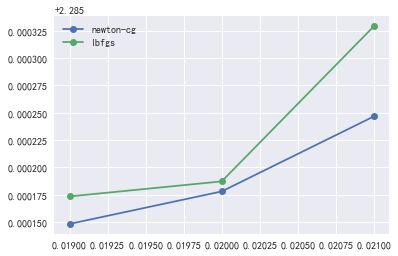

In [198]:
solvers = ["newton-cg","lbfgs"]
Cs = np.array([0.019, 0.02, 0.021]) 
opt_logit_parm(dtrain_X,dtrain_y,Cs = Cs,solvers=solvers)

In [145]:
def logistic_reg(train_x,train_y,test_x,C=0.02,solver = 'lbfgs'):
    clf = LogisticRegression(C=C, multi_class='multinomial',solver=solver)
    clf.fit(train_x, train_y)
    pred = clf.predict_proba(test_x)
    return pred

In [149]:
pred = logistic_reg(dtrain_X,dtrain_y,dtest_X)
log_loss(dtest_y, pred)

2.2790108786398795

In [150]:
pred = logistic_reg(Xtrain,Ytrain,Xtest)
pred = pd.DataFrame(pred, index = test.index, columns=targetencoder.classes_)
pred.head()
pred.to_csv('../input/logreg_subm.csv',index=True)

,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
device_id,,,,,,,,,,,,
1002079943728939269,0.002135,0.006673,0.013851,0.016982,0.027740,0.046255,0.013682,0.035040,0.071646,0.122932,0.251512,0.391554
-1547860181818787117,0.007577,0.015893,0.028318,0.067511,0.084191,0.144316,0.008343,0.076744,0.051568,0.081195,0.222904,0.211442
7374582448058474277,0.026266,0.040086,0.040218,0.153815,0.167866,0.082985,0.014786,0.029372,0.041580,0.097658,0.171933,0.133435
-6220210354783429585,0.005472,0.023529,0.011652,0.016008,0.060901,0.167219,0.041659,0.105891,0.058384,0.086792,0.181924,0.240569
-5893464122623104785,0.058713,0.059837,0.045241,0.063485,0.065774,0.050260,0.123269,0.147654,0.081403,0.097935,0.113851,0.092577


## XGBoost

In [87]:
import xgboost as xgb

In [106]:
def opt_num_boost_round(train_x,train_y,xgb_params):
    dtrain = xgb.DMatrix(train_x, train_y)
    cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=500, early_stopping_rounds=300,
        verbose_eval=50, show_stdv=False)
    cv_output[['train-mlogloss-mean', 'test-mlogloss-mean']].plot()
    
def xgb_model(train_x,train_y,test_x,xgb_params,num_round):
    dtrain = xgb.DMatrix(train_x, train_y)
    xgb_model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_round)
    pred = xgb_model.predict(xgb.DMatrix(test_x))
    return pred

[0]	train-mlogloss:2.48389	test-mlogloss:2.48416
[50]	train-mlogloss:2.4383	test-mlogloss:2.45105
[100]	train-mlogloss:2.40126	test-mlogloss:2.42549
[150]	train-mlogloss:2.37038	test-mlogloss:2.40541
[200]	train-mlogloss:2.34409	test-mlogloss:2.38925
[250]	train-mlogloss:2.32125	test-mlogloss:2.37609
[300]	train-mlogloss:2.30125	test-mlogloss:2.36526
[350]	train-mlogloss:2.28355	test-mlogloss:2.35623
[400]	train-mlogloss:2.26776	test-mlogloss:2.34864
[450]	train-mlogloss:2.25347	test-mlogloss:2.34218


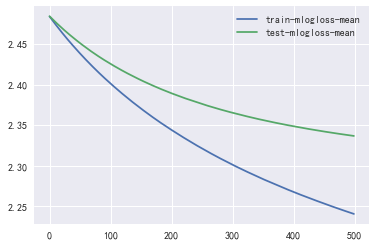

In [107]:
xgb_params = {
    'eta': 0.005, #0.05
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    "booster" : "gbtree", #or 'gblinear'
    'objective': 'multi:softprob',
    'num_class': nclasses,
    'eval_metric': 'mlogloss',
    'lambda': 3,
    'alpha': 2,
    'silent': 1
}

opt_num_boost_round(dtrain_X,dtrain_y,xgb_params)

In [105]:
pred = xgb_model(dtrain_X,dtrain_y,dtest_X,xgb_params,300)
log_loss(dtest_y, pred)

2.30496732446835

In [99]:
xgb_model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
pred = xgb_model.predict(xgb.DMatrix(Xtest))

In [102]:
pred = pd.DataFrame(pred, index = test.index, columns=targetencoder.classes_)
pred.head()
pred.to_csv('../input/xgb_subm.csv',index=True)

,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
device_id,,,,,,,,,,,,
1002079943728939269,0.020356,0.023972,0.027767,0.039740,0.062159,0.035723,0.020136,0.078256,0.102438,0.128514,0.192075,0.268864
-1547860181818787117,0.018284,0.022587,0.026807,0.054173,0.083987,0.116486,0.027733,0.065304,0.053067,0.119469,0.145895,0.266210
7374582448058474277,0.060965,0.057471,0.045250,0.132771,0.122005,0.070145,0.047743,0.047213,0.059929,0.091321,0.138754,0.126433
-6220210354783429585,0.019856,0.031435,0.018849,0.031528,0.101011,0.095204,0.022868,0.104557,0.061463,0.098732,0.158400,0.256096
-5893464122623104785,0.061490,0.058969,0.045441,0.063337,0.070501,0.055015,0.117777,0.139203,0.077900,0.096837,0.117411,0.096120
